In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 ##### 1. Load data 

In [2]:
 df = pd.read_csv('netflix_titles.csv')

##### 2. Quick overview

In [15]:
print(df.shape)

(8807, 14)


In [16]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'year_added', 'month_added']


In [17]:
 print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

##### 3. Basic cleaning

In [18]:
null_counts = df.isnull().sum()

In [19]:
null_counts

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      98
month_added     98
dtype: int64

###### Fill missing text fields with 'Unknown'

In [20]:
text_columns = ['director', 'cast', 'country', 'rating']
for col in text_columns:
    df[col] = df[col].fillna('Unknown')

In [21]:
df['date_added'] = df['date_added'].fillna('2000-01-01')
df['duration'] = df['duration'].fillna('Unknown')

In [22]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      98
month_added     98
dtype: int64

 ###### Convert to datetime

In [23]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

###### Year and month when added

In [24]:
 df['year_added'] = df['date_added'].dt.year
 df['month_added'] = df['date_added'].dt.month_name()

In [25]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [26]:
import re

In [27]:
def extract_minutes(x):
    if pd.isna(x):
        return np.nan
    m = re.search(r"(\d+)\s*min", str(x))
    if m:
        return int(m.group(1))
    return np.nan
def extract_seasons(x):
    if pd.isna(x):
        return np.nan
    s = re.search(r"(\d+)\s*Season", str(x))
    if s:
        return int(s.group(1))
    return np.nan

In [28]:
df['movie_minutes'] = df['duration'].apply(extract_minutes)
df['seasons'] = df['duration'].apply(extract_seasons)

In [29]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'movie_minutes', 'seasons'],
      dtype='object')

##### 4. Exploratory analysis examples

###### Movies vs TV Shows counts

In [30]:
type_counts = df['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


 ###### Top 10 categories

In [31]:
if 'listed_in' in df.columns:
    genres_series = df['listed_in'].dropna().str.split(',').explode().str.strip()
    top_genres = genres_series.value_counts().head(15)
    print(top_genres)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64


###### Content added per year

In [32]:
yearly = df.groupby('year_added').size().reset_index(name='count').sort_values('year_added')
print(yearly.tail())

    year_added  count
10        2017   1164
11        2018   1625
12        2019   1999
13        2020   1878
14        2021   1498


##### 5. Plotting

###### Movies vs TV Shows Plot

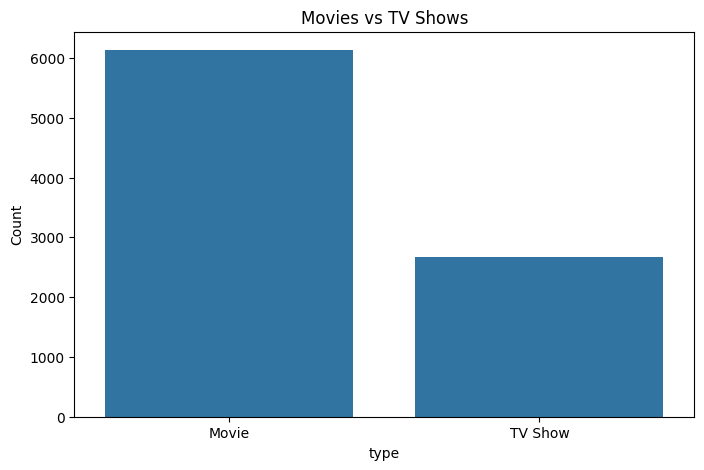

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Movies vs TV Shows')
plt.ylabel('Count')
plt.show()

###### Top categories bar chart

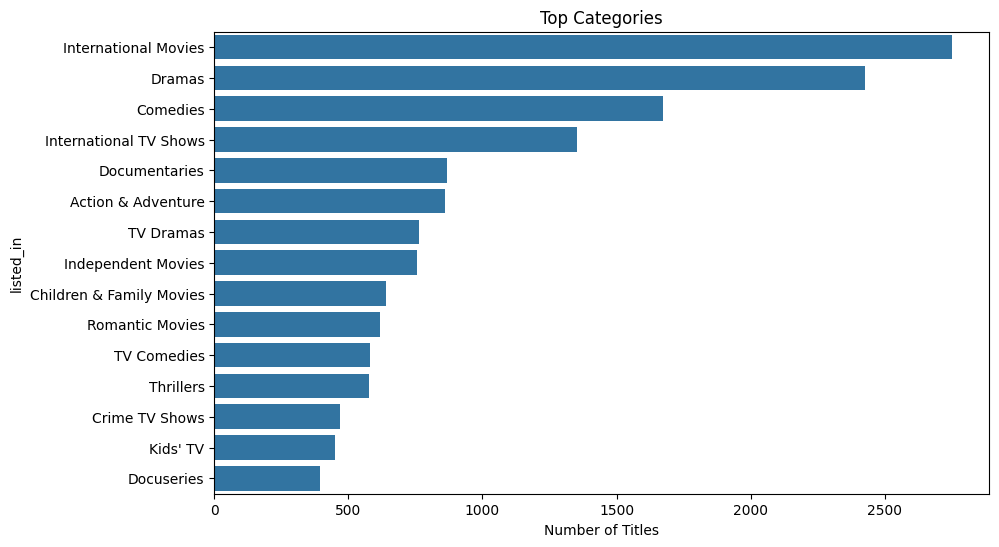

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Categories')
plt.xlabel('Number of Titles')
plt.show()

###### Yearly additions line

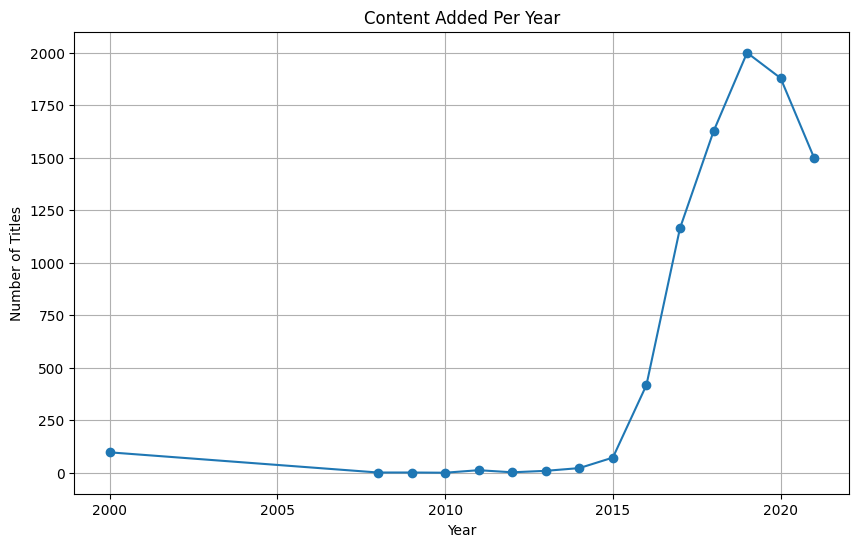

In [35]:
 plt.figure(figsize=(10,6))
 plt.plot(yearly['year_added'], yearly['count'], marker='o')
 plt.title('Content Added Per Year')
 plt.xlabel('Year')
 plt.ylabel('Number of Titles')
 plt.grid(True)
 plt.show()

 ###### 6. Export cleaned CSV

In [36]:
 clean_cols = df.copy()

In [37]:
 clean_cols.to_csv('netflix_cleaned.csv', index=False)
 print('Cleaned CSV exported: netflix_cleaned.csv')

Cleaned CSV exported: netflix_cleaned.csv


In [40]:
!pip install pymysql sqlalchemy

In [42]:
from sqlalchemy import create_engine

# MySQL connection
username = "root"
password = "2005"
host = "localhost"
port = "3306"
database = "project"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "netflix"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

# Read back sample
pd.read_sql("SELECT * FROM netflix LIMIT 5;", engine)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,movie_minutes,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,NaN,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,NaN,2.0
